# Оценка доступности крытых бассейнов и термальных источников в Белграде


In [ ]:
from pathlib import Path

import osmnx as ox
from IPython.display import Image

ox.__version__
img_folder = "images"
extension = "png"
size = 240

tags = {"building": True}

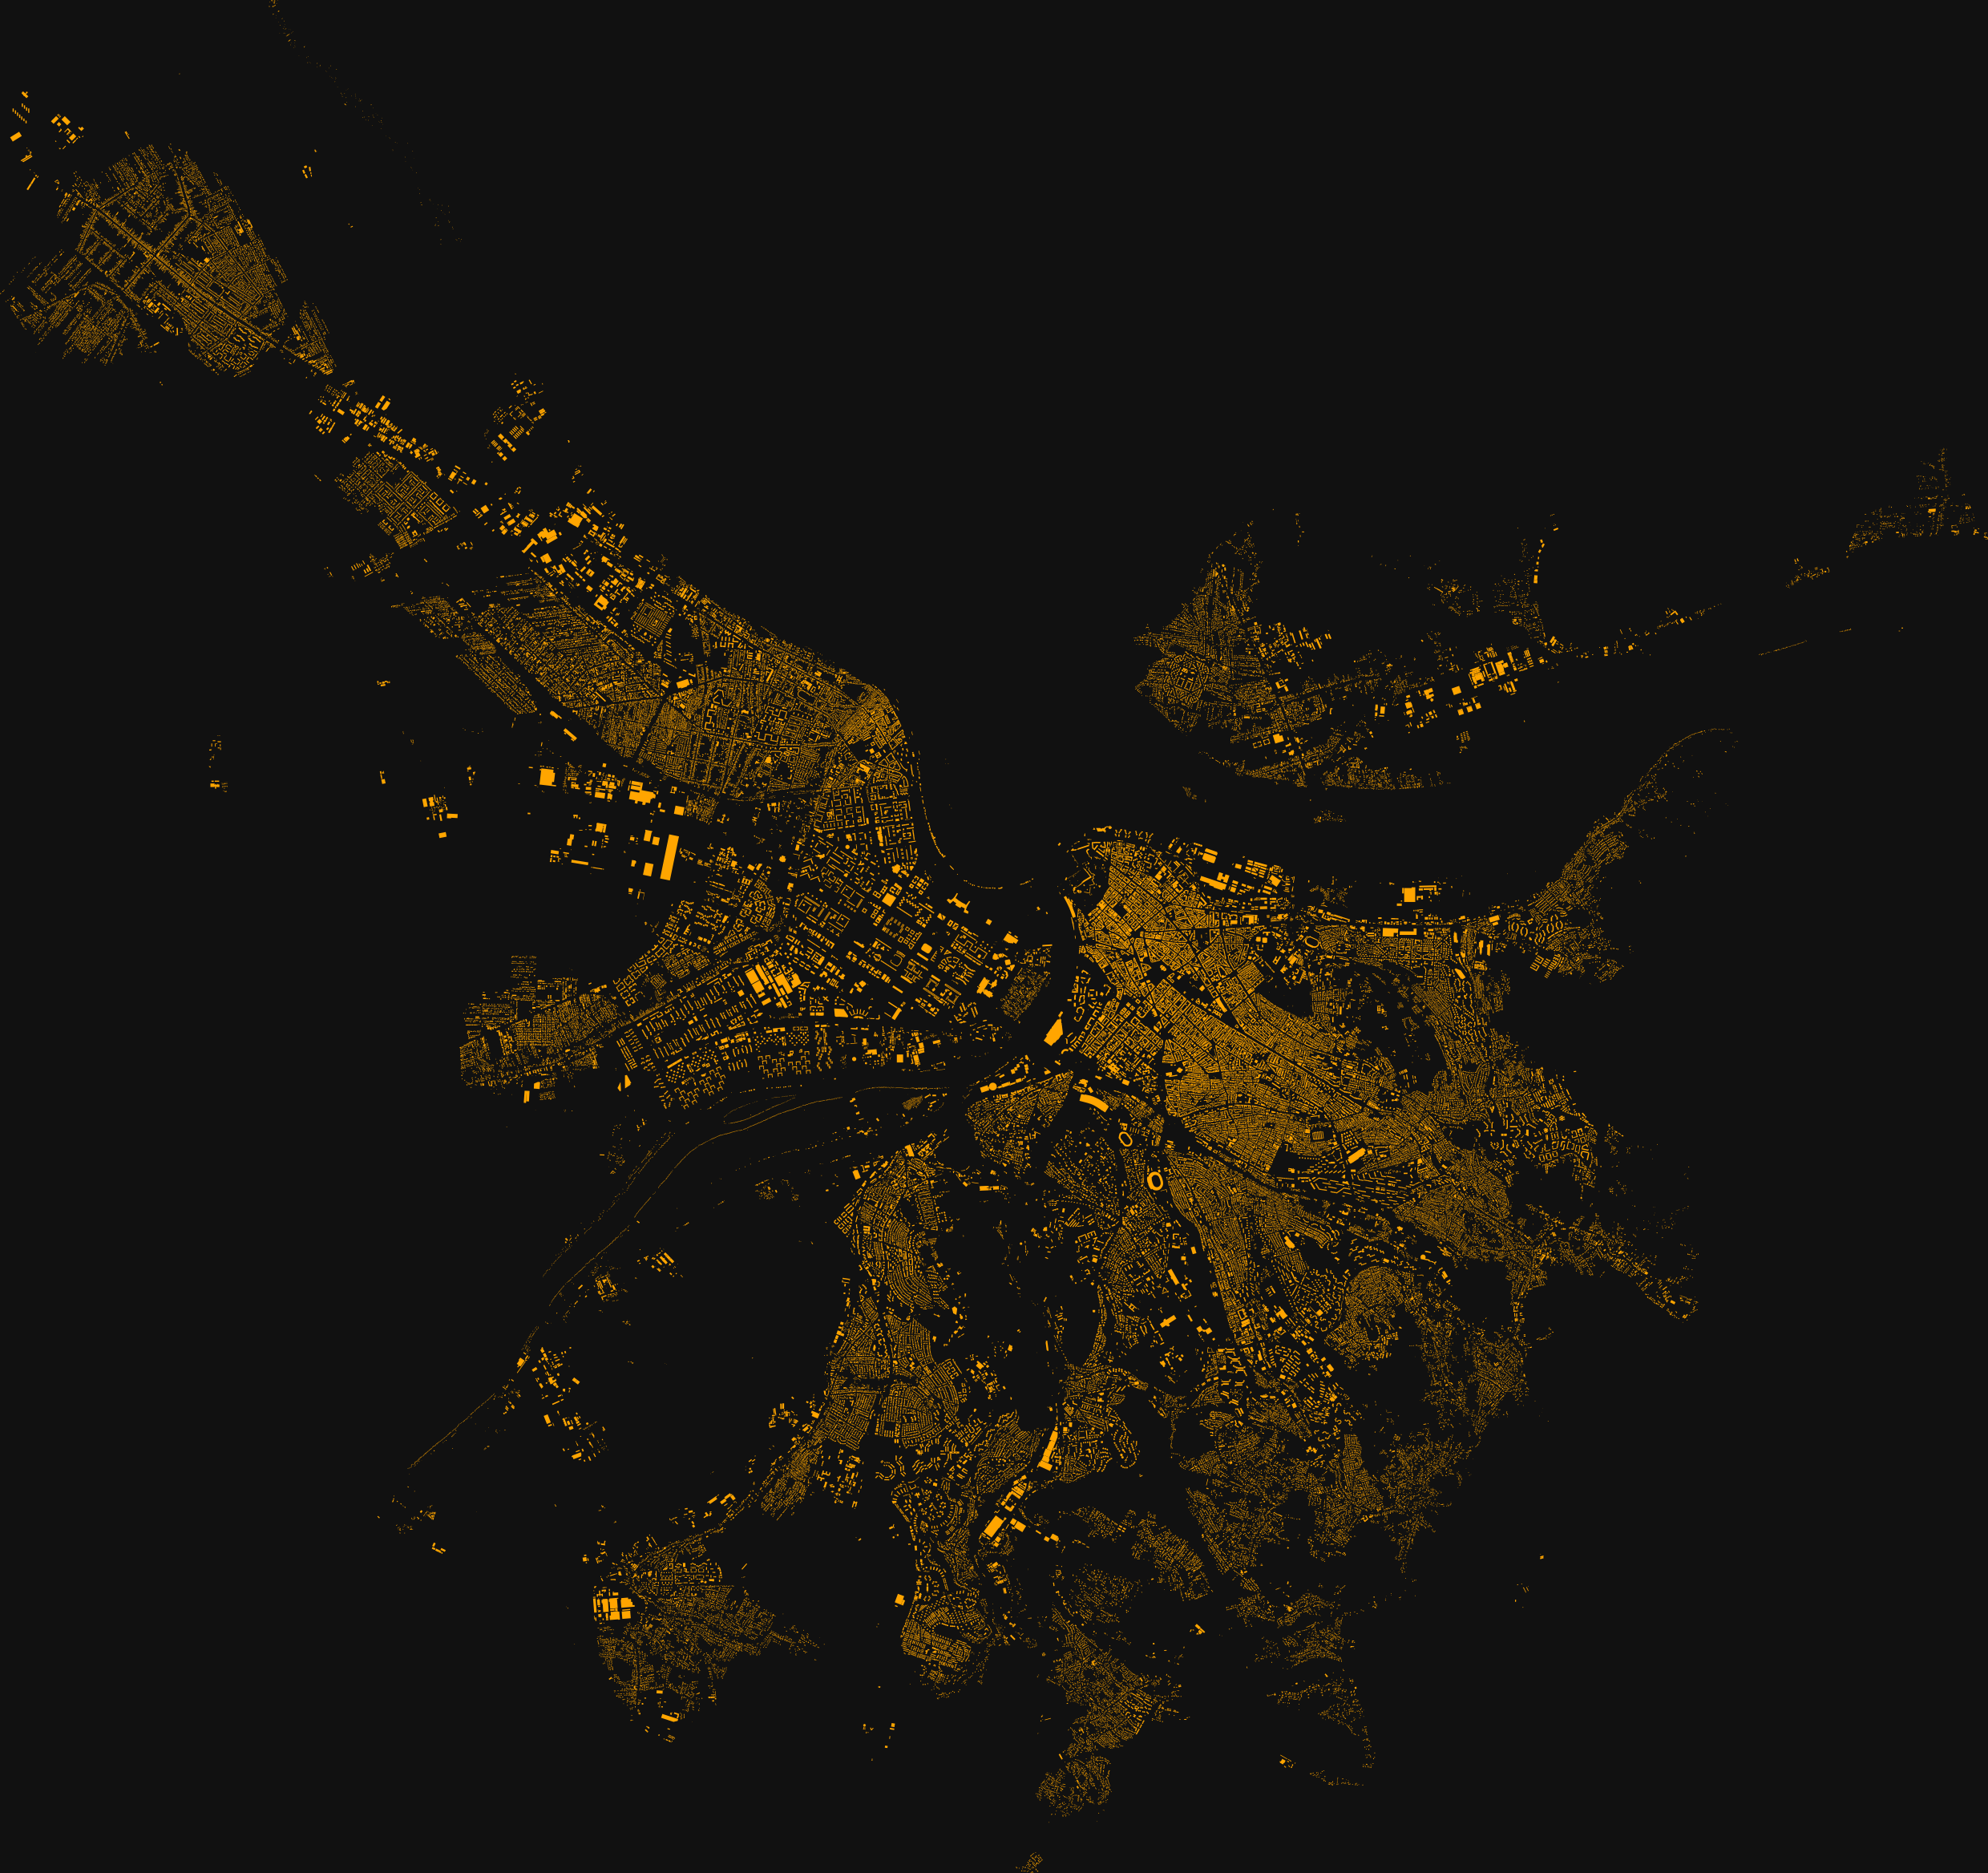

In [58]:
gdf = ox.features.features_from_place("Belgrade, Serbia", tags)
gdf_proj = ox.projection.project_gdf(gdf)
fp = f"./{img_folder}/belgrade_bldgs.{extension}"
fig, ax = ox.plot.plot_footprints(gdf_proj, filepath=fp, dpi=400, save=True, show=False, close=True)
Image(fp, height=size, width=size)

In [60]:
tags = {"amenity": ["public_bath"], "sport": "swimming", "beauty": "spa", "leisure": ["swimming_pool", "swimming_area", "water_park", "sauna"]}

pool_gdf = ox.features.features_from_place("Belgrade, Serbia", tags)
pool_proj = ox.projection.project_gdf(pool_gdf)
pool_gdf.shape


(112, 33)

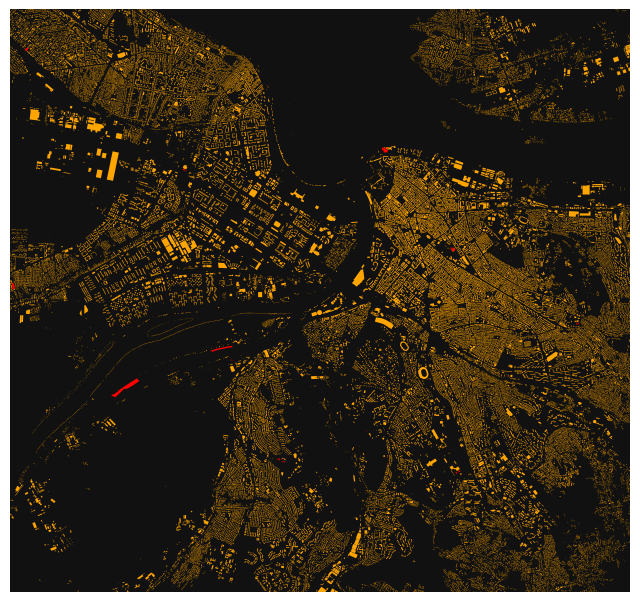

In [64]:
fig, ax = ox.plot.plot_footprints(gdf_proj, filepath=fp, dpi=1000, save=False, show=False)
fig, ax = ox.plot.plot_footprints(pool_proj, ax=ax, filepath=fp, dpi=1000, save=True, show=True, close=True, color="red")


In [ ]:
tags = {"amenity": ["public_bath", "hospital"]}

gdf = ox.features.features_from_place("Serbia", tags)
gdf.shape

/Users/katchinskiy/geopython/geopython_env/lib/python3.11/site-packages/osmnx/_overpass.py:271: UserWarning: This area is 43 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


(420, 97)

In [69]:
gdf[(gdf.amenity == "hospital") & (gdf.name.str.lower().str.contains("banja"))]

,,geometry,amenity,name,name:mk,name:sr,emergency,addr:postcode,addr:street,name:en,name:sq,...,fixme,official_name,official_name:sr,official_name:sr-Latn,addr:block,temperature,type,alt_name:en,alt_name:hu,area
element,id,,,,,,,,,,,,,,,,,,,,,


In [73]:
gdf[~(gdf.name.isna()) & gdf.name.str.lower().str.contains("бања")]



geometry  \
element  id                                                              
node     3484415169                          POINT (20.05228 45.61458)   
         5964939082                          POINT (20.21265 44.65713)   
         9002362583                          POINT (20.20281 44.65386)   
relation 11695424    POLYGON ((21.86692 43.63758, 21.86768 43.63786...   
         14686591    POLYGON ((20.55205 44.30839, 20.55207 44.30841...   
way      446828606   POLYGON ((21.5061 43.42599, 21.50759 43.4262, ...   
         1027747287  POLYGON ((19.15772 44.51208, 19.15779 44.51203...   
         1037128145  POLYGON ((20.06134 46.06024, 20.06355 46.06185...   
         1138757788  POLYGON ((20.30165 45.52793, 20.30151 45.52765...   

                         amenity  \
element  id                        
node     3484415169     hospital   
         5964939082  public_bath   
         9002362583  public_bath   
relation 11695424       hospital   
         14686591       hospital   
way      446828606      hospital   
         1027747287     hospital   
         1037128145     hospital   
         1138757788     hospital   

                                                                  name  \
element  id                                                              
node     3484415169                                         Јодна бања   
         5964939082                            Отворена бања Обреновац   
         9002362583                                   Обреновачка бања   
relation 11695424                          Специјална болница Сокобања   
         14686591    Специјална болница за рехабилитацију Буковичка...   
way      446828606   Специјална болница за рехабилитацију „Рибарска...   
         1027747287  Специјална болница за рехабилитацију Бања Кови...   
         1037128145                                        Бања Кањижа   
         1138757788                                       Бања Русанда   

                    name:mk  \
element  id                   
node     3484415169     NaN   
         5964939082     NaN   
         9002362583     NaN   
relation 11695424       NaN   
         14686591       NaN   
way      446828606      NaN   
         1027747287     NaN   
         1037128145     NaN   
         1138757788     NaN   

                                                               name:sr  \
element  id                                                              
node     3484415169                                         Јодна бања   
         5964939082                            Отворена бања Обреновац   
         9002362583                                   Обреновачка бања   
relation 11695424                          Специјална болница Сокобања   
         14686591    Специјална болница за рехабилитацију Буковичка...   
way      446828606                                                 NaN   
         1027747287  Специјална болница за рехабилитацију Бања Кови...   
         1037128145                                        Бања Кањижа   
         1138757788                                       Бања Русанда   

                    emergency addr:postcode   addr:street  \
element  id                                                 
node     3484415169       NaN           NaN           NaN   
         5964939082       NaN           NaN           NaN   
         9002362583       NaN           NaN           NaN   
relation 11695424         NaN           NaN           NaN   
         14686591         NaN         34300      Мишарска   
way      446828606        NaN         37205           NaN   
         1027747287       NaN         15316           NaN   
         1037128145       NaN         24420  Народни парк   
         1138757788       NaN         23270           NaN   

                                                             name:en name:sq  \
element  id                                                                    
node     3484415169                           

In [ ]:
gdf[gdf.amenity != "hospital"]

array(['public_bath'], dtype=object)